# Dimensionality Reduction Using t-SNE

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


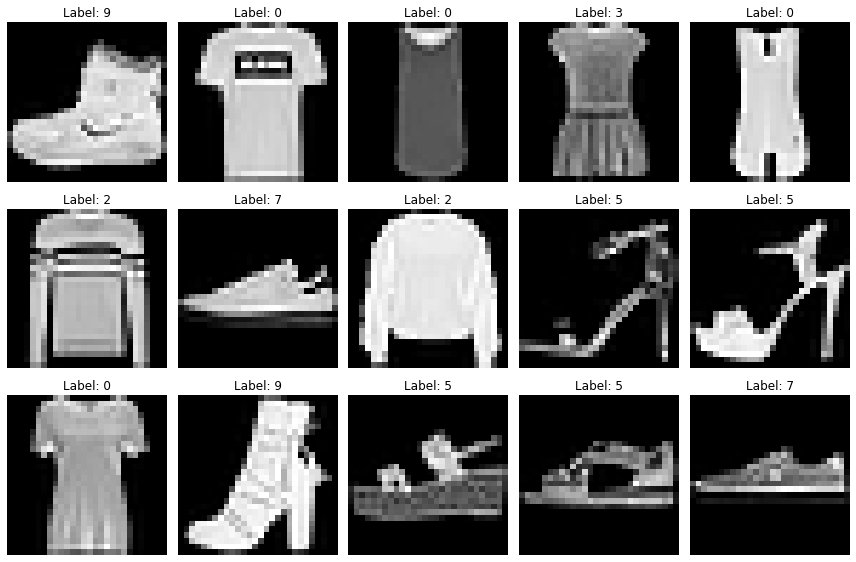

In [2]:
# Displaying the head of the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the data
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

In [4]:
# Reshape the data into the format suitable for DataFrame
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  
x_train_tsne = tsne.fit_transform(x_train_flat)
x_test_tsne = tsne.fit_transform(x_test_flat)


In [5]:
# Create DataFrame for train and test data
train = pd.DataFrame(x_train_tsne)
train['label'] = y_train

test = pd.DataFrame(x_test_tsne)
test['label'] = y_test

# Print shapes of the datasets
print("Train DataFrame shape:", train.shape)
print("Test DataFrame shape:", test.shape)

Train DataFrame shape: (60000, 3)
Test DataFrame shape: (10000, 3)


In [6]:
# Display the first few rows of train DataFrame
print(train.head())

           0          1  label
0 -42.982185  73.936348      9
1  65.209343 -73.534035      0
2  -1.125311 -26.331484      0
3  10.212543 -31.360268      3
4   5.080834 -65.615913      0


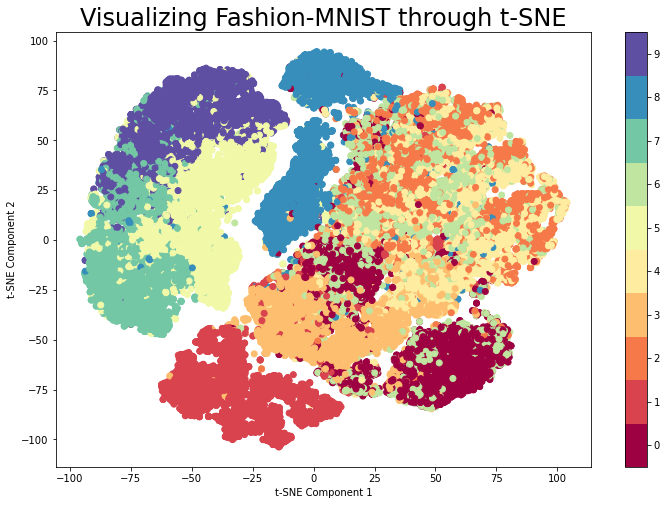

In [7]:
# Display the dataset after t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Fashion-MNIST through t-SNE', fontsize=24)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [8]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM classifier
svm_classifier.fit(x_train_tsne, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(x_test_tsne)


In [10]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1000
           1       1.00      0.59      0.74      1000
           2       0.41      0.44      0.42      1000
           3       0.41      0.69      0.52      1000
           4       0.48      0.44      0.46      1000
           5       0.50      0.81      0.62      1000
           6       0.33      0.27      0.29      1000
           7       0.86      0.68      0.76      1000
           8       0.80      0.84      0.82      1000
           9       0.92      0.46      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.62      0.57      0.57     10000
weighted avg       0.62      0.57      0.57     10000



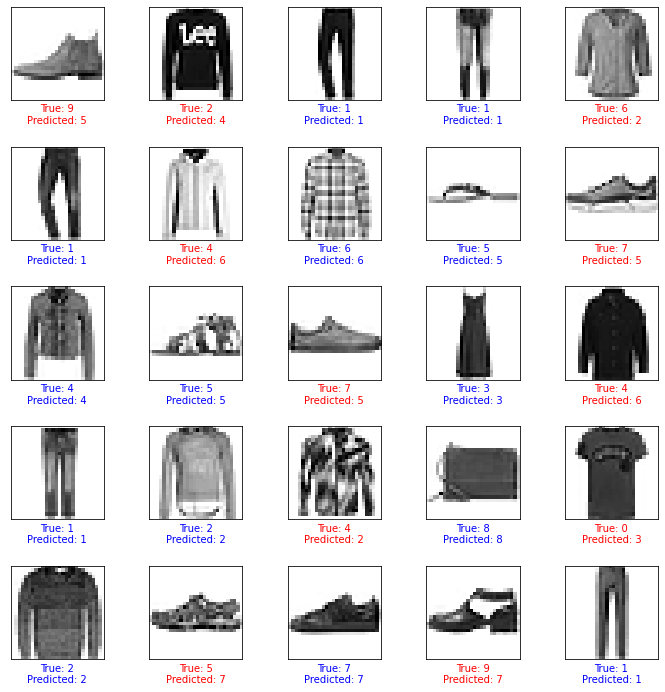

In [11]:
# Display a few sample images along with predicted labels and true labels
plt.figure(figsize=(12, 12)) 
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary) 
    predicted_label = y_pred[i]  
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.show()
